In [1]:
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas_datareader.data as web
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates
import bs4 as bs
import pickle
import requests
import mpld3
mpld3.enable_notebook()
%matplotlib inline

/home/harsh/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
df_JPM=pd.read_csv('JPM1.csv')

In [3]:
df_JPM.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,SMA,SMA_100,EMA
2009,2017-12-22,108.199997,108.459999,106.809998,107.449997,106.893158,14573400,104.662281,96.556956,104.457278
2010,2017-12-26,107.199997,107.989998,106.400002,107.019997,106.465385,7403700,105.114426,96.706751,104.648526
2011,2017-12-27,106.669998,107.290001,106.669998,107.220001,106.664352,9496500,105.405908,96.847064,104.840509
2012,2017-12-28,107.400002,107.839996,107.160004,107.790001,107.231400,7440600,105.607856,96.989486,105.068213
2013,2017-12-29,108.089996,108.279999,106.940002,106.940002,106.385803,8925700,105.728229,97.126815,105.193698


In [14]:
gain=[]
loss=[]
for index, row in df_JPM.iterrows():
    f=df_JPM.iloc[index+1]['Close']-df_JPM.iloc[index]['Close']
    #print(f)
    if f>0:
        gain.append(f)
        loss.append(0)
    else:
        loss.append(f)
        gain.append(0)
df_loss_gain=pd.DataFrame(list(zip(gain,loss)),columns=['Gain','Loss'])
df_JPM=pd.concat([df_JPM,df_loss_gain],axis=1)
df_JPM['Loss']=df_JPM['Loss']*(-1)

IndexError: single positional indexer is out-of-bounds

In [19]:
len(gain)

2014

In [18]:
len(loss)

2014

In [17]:
gain.append(0)
loss.append(0)

In [20]:
df_loss_gain=pd.DataFrame(list(zip(gain,loss)),
              columns=['Gain','Loss'])

In [21]:
df_loss_gain

,Gain,Loss
0,1.180000,0.000000
1,0.830002,0.000000
2,0.239998,0.000000
3,0.870003,0.000000
4,0.000000,-0.110001
5,0.000000,-0.150001
6,0.000000,-1.039997
7,0.759998,0.000000
8,0.439999,0.000000
9,0.000000,-1.009999


In [28]:
df_temp=pd.concat([df_JPM,df_loss_gain],axis=1)

In [43]:
df_temp.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,SMA,SMA_100,EMA,Gain,Loss,Average_Gain,Average_Loss,Relative_Strength,RSI
2009,2017-12-22,108.199997,108.459999,106.809998,107.449997,106.893158,14573400,104.662281,96.556956,104.457278,0.000000,0.430000,0.466428,0.373571,1.248565,55.527201
2010,2017-12-26,107.199997,107.989998,106.400002,107.019997,106.465385,7403700,105.114426,96.706751,104.648526,0.200004,-0.000000,0.480714,0.317142,1.515767,60.250688
2011,2017-12-27,106.669998,107.290001,106.669998,107.220001,106.664352,9496500,105.405908,96.847064,104.840509,0.570000,-0.000000,0.521428,0.295000,1.767555,63.867020
2012,2017-12-28,107.400002,107.839996,107.160004,107.790001,107.231400,7440600,105.607856,96.989486,105.068213,0.000000,0.849999,0.427857,0.355714,1.202812,54.603476
2013,2017-12-29,108.089996,108.279999,106.940002,106.940002,106.385803,8925700,105.728229,97.126815,105.193698,0.000000,-0.000000,0.427857,0.333571,1.282655,56.191368


In [30]:
df_temp['Loss']=df_temp['Loss']*(-1)

In [34]:
df_temp['Average_Gain']=df_temp['Gain'].rolling(window=14).mean()
df_temp['Average_Loss']=df_temp['Loss'].rolling(window=14).mean()
df_temp['Relative_Strength']=df_temp['Average_Gain']/df_temp['Average_Loss']
df_temp['RSI']=100-100/(1+df_temp['Relative_Strength'])

In [35]:
df_temp['Average_Loss']=df_temp['Loss'].rolling(window=14).mean()

In [38]:
df_temp['Relative_Strength']=df_temp['Average_Gain']/df_temp['Average_Loss']

In [42]:
df_temp['RSI']=100-100/(1+df_temp['Relative_Strength'])

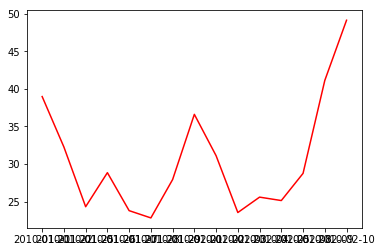

In [50]:
plt.plot(df_temp['Date'][0:28],df_temp['RSI'][0:28],'r')

In [51]:
df_temp.to_csv('JPM1.csv')